In [1]:
import pandas as pd 
data = pd.read_csv("NH_Technical_Test.csv") 
data.head()

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price
0,9162,872143.0,1115707,Paid,Active,4,18,0.42,1Y,Renew,2019-12-05T22:36:44Z,2019-12-25T12:30:11Z,NaN,12,216,125.28
1,246708,875146.0,841327,Paid,Active,11,39,0.14,1M,Activate,2019-12-09T04:20:49Z,2019-12-09T04:25:11Z,NaN,1,39,33.54
2,52476,856128.0,1197628,Paid,Active,12,49,0.69,1M,Renew,2019-11-20T21:24:37Z,2019-12-03T23:33:27Z,NaN,1,49,15.19
3,129362,869645.0,1004638,Paid,Active,1,6,0.44,1Y,Renew,2019-12-04T00:37:05Z,2019-12-15T13:13:30Z,NaN,12,72,40.32
4,47277,843127.0,1184209,Paid,Active,3,13,0.34,1Y,Renew,2019-11-06T21:24:30Z,2019-12-04T03:37:11Z,NaN,12,156,102.96


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
import seaborn as sns

# Task 4.a Data Cleansing

Delete duplicated data.
First exlude the invoice_item_id for duplication detection because this variable has unique value

In [3]:
data['duplicated'] = data.duplicated(subset=data.columns.difference(['invoice_item_id']))
data

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price,duplicated
0,9162,872143.0,1115707,Paid,Active,4,18,0.42,1Y,Renew,2019-12-05T22:36:44Z,2019-12-25T12:30:11Z,NaN,12,216,125.28,False
1,246708,875146.0,841327,Paid,Active,11,39,0.14,1M,Activate,2019-12-09T04:20:49Z,2019-12-09T04:25:11Z,NaN,1,39,33.54,False
2,52476,856128.0,1197628,Paid,Active,12,49,0.69,1M,Renew,2019-11-20T21:24:37Z,2019-12-03T23:33:27Z,NaN,1,49,15.19,False
3,129362,869645.0,1004638,Paid,Active,1,6,0.44,1Y,Renew,2019-12-04T00:37:05Z,2019-12-15T13:13:30Z,NaN,12,72,40.32,False
4,47277,843127.0,1184209,Paid,Active,3,13,0.34,1Y,Renew,2019-11-06T21:24:30Z,2019-12-04T03:37:11Z,NaN,12,156,102.96,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89540,259942,881975.0,884574,Paid,Active,3,13,0.50,1Y,Activate,2019-12-16T06:14:36Z,2019-12-18T06:21:09Z,NaN,12,156,78.00,True
89541,84615,882013.0,1070069,Paid,Active,3,13,0.50,1Y,Renew,2019-12-16T07:00:45Z,2019-12-20T03:20:26Z,NaN,12,156,78.00,True
89542,129895,882042.0,1155193,Paid,Active,4,18,0.37,1Y,Renew,2019-12-16T07:24:39Z,2019-12-16T10:04:59Z,NaN,12,216,136.08,True
89543,259997,882147.0,952162,Paid,Active,3,13,0.75,3Y,Activate,2019-12-16T09:17:21Z,2019-12-16T09:20:06Z,NaN,36,468,117.00,True


In [4]:
duplicatedData = data.query('duplicated==True')
duplicatedData

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price,duplicated
2004,176466,594647.0,839586,Paid,Suspended,4,18,0.42,1Y,Activate,2019-01-03T03:12:51Z,2019-01-03T03:21:05Z,NaN,12,216,125.28,True
2206,182643,595660.0,840935,Paid,Active,4,18,0.42,1Y,Activate,2019-01-04T04:38:49Z,2019-01-04T08:49:34Z,NaN,12,216,125.28,True
2856,183714,599497.0,846038,Paid,Active,3,13,0.50,1Y,Activate,2019-01-09T04:25:53Z,2019-01-09T07:41:24Z,NaN,12,156,78.00,True
2899,151600,596442.0,841989,Paid,Active,3,13,0.50,1Y,Activate,2019-01-05T05:15:10Z,2019-01-09T12:13:08Z,NaN,12,156,78.00,True
5187,187204,612731.0,863642,Paid,Active,3,13,0.76,3Y,Activate,2019-01-25T05:15:45Z,2019-01-25T05:25:09Z,NaN,36,468,112.32,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89540,259942,881975.0,884574,Paid,Active,3,13,0.50,1Y,Activate,2019-12-16T06:14:36Z,2019-12-18T06:21:09Z,NaN,12,156,78.00,True
89541,84615,882013.0,1070069,Paid,Active,3,13,0.50,1Y,Renew,2019-12-16T07:00:45Z,2019-12-20T03:20:26Z,NaN,12,156,78.00,True
89542,129895,882042.0,1155193,Paid,Active,4,18,0.37,1Y,Renew,2019-12-16T07:24:39Z,2019-12-16T10:04:59Z,NaN,12,216,136.08,True
89543,259997,882147.0,952162,Paid,Active,3,13,0.75,3Y,Activate,2019-12-16T09:17:21Z,2019-12-16T09:20:06Z,NaN,36,468,117.00,True


In [5]:
cleanData = data[data['duplicated'] == False]
cleanData

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price,duplicated
0,9162,872143.0,1115707,Paid,Active,4,18,0.42,1Y,Renew,2019-12-05T22:36:44Z,2019-12-25T12:30:11Z,NaN,12,216,125.28,False
1,246708,875146.0,841327,Paid,Active,11,39,0.14,1M,Activate,2019-12-09T04:20:49Z,2019-12-09T04:25:11Z,NaN,1,39,33.54,False
2,52476,856128.0,1197628,Paid,Active,12,49,0.69,1M,Renew,2019-11-20T21:24:37Z,2019-12-03T23:33:27Z,NaN,1,49,15.19,False
3,129362,869645.0,1004638,Paid,Active,1,6,0.44,1Y,Renew,2019-12-04T00:37:05Z,2019-12-15T13:13:30Z,NaN,12,72,40.32,False
4,47277,843127.0,1184209,Paid,Active,3,13,0.34,1Y,Renew,2019-11-06T21:24:30Z,2019-12-04T03:37:11Z,NaN,12,156,102.96,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88217,167962,882294.0,1234042,Unpaid,Pending Setup,1,6,0.29,1Y,Activate,2019-12-16T15:50:32Z,NaN,NaN,12,72,51.12,False
88218,154829,882303.0,1234057,Unpaid,Pending Setup,4,18,0.42,1Y,Activate,2019-12-16T16:17:52Z,NaN,NaN,12,216,125.28,False
88219,260103,882308.0,1234065,Unpaid,Pending Setup,1,6,0.32,1Y,Activate,2019-12-16T16:30:42Z,NaN,NaN,12,72,48.96,False
88220,123628,882310.0,1234067,Unpaid,Active,2,9,0.31,1Y,Activate,2019-12-16T16:36:42Z,NaN,NaN,12,108,74.52,False


Delete 3608 data we indicate as duplicate data and remove it from the dataframe

# Task 4.b Total Revenue

Calculate revenue for each product

In [6]:
paidProduct = cleanData[cleanData['invoice_status'] == 'Paid']
paidProduct

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price,duplicated
0,9162,872143.0,1115707,Paid,Active,4,18,0.42,1Y,Renew,2019-12-05T22:36:44Z,2019-12-25T12:30:11Z,NaN,12,216,125.28,False
1,246708,875146.0,841327,Paid,Active,11,39,0.14,1M,Activate,2019-12-09T04:20:49Z,2019-12-09T04:25:11Z,NaN,1,39,33.54,False
2,52476,856128.0,1197628,Paid,Active,12,49,0.69,1M,Renew,2019-11-20T21:24:37Z,2019-12-03T23:33:27Z,NaN,1,49,15.19,False
3,129362,869645.0,1004638,Paid,Active,1,6,0.44,1Y,Renew,2019-12-04T00:37:05Z,2019-12-15T13:13:30Z,NaN,12,72,40.32,False
4,47277,843127.0,1184209,Paid,Active,3,13,0.34,1Y,Renew,2019-11-06T21:24:30Z,2019-12-04T03:37:11Z,NaN,12,156,102.96,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52423,74461,876940.0,1225832,Paid,Active,3,13,0.50,3Y,Renew,2019-12-11T00:00:41Z,2019-12-31T02:57:17Z,NaN,36,468,234.00,False
52426,15425,880099.0,1230653,Paid,Active,3,13,0.50,1Y,Renew,2019-12-13T22:12:57Z,2019-12-31T09:03:16Z,NaN,12,156,78.00,False
52427,50642,877841.0,1227281,Paid,Active,3,13,0.50,1Y,Renew,2019-12-11T20:24:53Z,2019-12-31T09:37:55Z,NaN,12,156,78.00,False
52429,69925,881656.0,1232953,Paid,Active,12,49,0.11,1M,Renew,2019-12-15T20:12:53Z,2019-12-31T10:45:22Z,NaN,1,49,43.61,False


In [7]:
paidProduct[paidProduct['client_id']==77223]

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price,duplicated
39166,77223,794300.0,1099065,Paid,Active,3,13,514.14,1Y,Renew,2019-09-12T20:12:44Z,2019-09-27T07:03:48Z,NaN,12,156,-80049.84,False


In [8]:
productCount = paidProduct[['product_id' , 'discounted_price']].groupby(['product_id']).agg(['sum', 'count'])
productCount

discounted_price       
                        sum  count
product_id                        
1                 189094.32   3643
2                 676335.96   9301
3                1983922.20  21899
4                 857920.68   6230
5                  67763.04    746
6                  34008.84    288
7                 143920.00    481
8                  15793.88     71
9                  92866.75   2580
10                 94813.88   1302
11                187125.51   1588
12                142894.78   1010
13                 54249.40    286
14                141798.06    560

In [9]:
productCount.discounted_price.sort_values(by='sum', ascending=False)

,sum,count
product_id,,
3,1983922.20,21899
4,857920.68,6230
2,676335.96,9301
1,189094.32,3643
11,187125.51,1588
7,143920.00,481
12,142894.78,1010
14,141798.06,560
10,94813.88,1302


# Task 4.c Loyal Customer

The answer for 4.c included on section 4.e

# Task 4.d Average Time Duration

Calculate time duration for clients to complete their payments using invoice_created_at and invoice_paid_at

In [10]:
d1 = paidProduct['invoice_created_at'].astype('datetime64[ns]') 
d2 = paidProduct['invoice_paid_at'].astype('datetime64[ns]') 
timeDuration = d2-d1
timeDuration.mean()

Timedelta('5 days 09:38:40.858514')

In [11]:
timeDuration.mean()

Timedelta('5 days 09:38:40.858514')

# Task 4.e Customer Segmentation

Customer segmentation using RFM
To make the RFM table, we can create these columns, such as Recency, Frequency, and MonetaryValue column.
- To get the number of days for recency column, we can subtract the snapshot date with the date where the transaction occurred.
- To create the frequency column, we can count how much transactions by each customer.
- Lastly, to create the monetary value (revenue) column, we can sum all transactions for each customer.

In [12]:
newCleanData = cleanData.drop(['invoice_id','invoice_item_id','duplicated','invoice_created_at','service_cancelled_at','monthly_price_usd','discount','service_period'], axis=1)

In [13]:
from datetime import datetime
newCleanData['invoice_paid_at'] = pd.to_datetime(newCleanData['invoice_paid_at'])
newCleanData

,client_id,invoice_status,service_status,product_id,client_task,invoice_paid_at,monthly_period,total_price,discounted_price
0,9162,Paid,Active,4,Renew,2019-12-25 12:30:11+00:00,12,216,125.28
1,246708,Paid,Active,11,Activate,2019-12-09 04:25:11+00:00,1,39,33.54
2,52476,Paid,Active,12,Renew,2019-12-03 23:33:27+00:00,1,49,15.19
3,129362,Paid,Active,1,Renew,2019-12-15 13:13:30+00:00,12,72,40.32
4,47277,Paid,Active,3,Renew,2019-12-04 03:37:11+00:00,12,156,102.96
...,...,...,...,...,...,...,...,...,...
88217,167962,Unpaid,Pending Setup,1,Activate,NaT,12,72,51.12
88218,154829,Unpaid,Pending Setup,4,Activate,NaT,12,216,125.28
88219,260103,Unpaid,Pending Setup,1,Activate,NaT,12,72,48.96
88220,123628,Unpaid,Active,2,Activate,NaT,12,108,74.52


In [14]:
newCleanData.groupby('invoice_status').sum()

,client_id,product_id,monthly_period,total_price,discounted_price
invoice_status,,,,,
Cancelled,364315,9,72,804,297.72
Paid,7519220539,199641,721823,10219261,4682507.30
Refunded,106486153,2750,9223,151493,50777.89
Unpaid,5302481031,117053,506145,6912192,3654854.14


In [15]:
newCleanData = newCleanData[newCleanData['invoice_status'] == 'Paid']

In [16]:
tx_user = pd.DataFrame(newCleanData['client_id'].unique())
tx_user.columns = ['client_id']
tx_user

,client_id
0,9162
1,246708
2,52476
3,129362
4,47277
...,...
36049,181398
36050,88183
36051,74461
36052,50642


In [17]:
tx_max_purchase = newCleanData.groupby('client_id').invoice_paid_at.max().reset_index()
tx_max_purchase.columns = ['client_id','MaxPurchaseDate']

In [18]:
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days
tx_max_purchase

,client_id,MaxPurchaseDate,Recency
0,22,2019-04-23 04:55:14+00:00,252.0
1,37,2019-08-20 06:06:03+00:00,133.0
2,39,2019-11-10 05:23:09+00:00,51.0
3,45,2019-02-15 07:21:10+00:00,319.0
4,46,2019-06-21 10:57:08+00:00,193.0
...,...,...,...
36049,260088,2019-12-16 15:18:02+00:00,15.0
36050,260089,2019-12-16 15:32:58+00:00,15.0
36051,260092,2019-12-19 11:29:08+00:00,12.0
36052,260095,2019-12-17 07:17:09+00:00,14.0


In [19]:
tx_user = pd.merge(tx_user, tx_max_purchase[['client_id','Recency']], on='client_id')
tx_user.head()

,client_id,Recency
0,9162,6.0
1,246708,22.0
2,52476,27.0
3,129362,16.0
4,47277,27.0


In [20]:
tx_user['Recency'] = tx_user['Recency'].fillna(0)

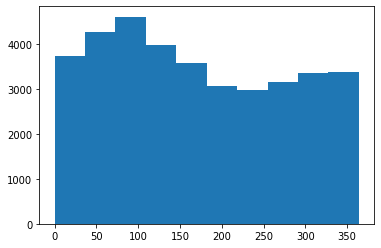

In [21]:
plt.hist(tx_user.Recency)
plt.show()

In [22]:
tx_user.Recency.describe()

count    36054.000000
mean       172.100793
std        104.699096
min          0.000000
25%         81.000000
50%        159.000000
75%        266.000000
max        364.000000
Name: Recency, dtype: float64

In [23]:
tx_frequency = newCleanData.groupby('client_id').invoice_paid_at.count().reset_index()
tx_frequency.columns = ['client_id','Frequency']

In [24]:
tx_user = pd.merge(tx_user, tx_frequency, on='client_id')
tx_user.head()

,client_id,Recency,Frequency
0,9162,6.0,4
1,246708,22.0,7
2,52476,27.0,4
3,129362,16.0,7
4,47277,27.0,1


In [25]:
tx_user.sort_values(by='Frequency', ascending=False)

,client_id,Recency,Frequency
130,147944,3.0,123
182,16146,12.0,101
117,131891,27.0,64
636,71117,1.0,60
511,189676,29.0,47
...,...,...,...
15402,204998,237.0,1
2278,182460,358.0,1
15399,65056,237.0,1
15398,32800,237.0,1


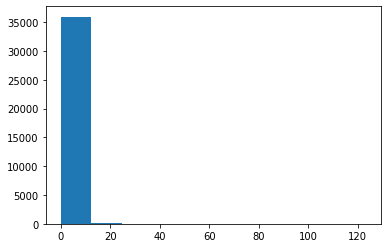

In [26]:
plt.hist(tx_user.Frequency,range =(tx_user.Frequency.min(), tx_user.Frequency.max()))
plt.show()

In [27]:
tx_user.Frequency.describe()

count    36054.000000
mean         1.386365
std          1.825296
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        123.000000
Name: Frequency, dtype: float64

In [28]:
revenue = newCleanData.groupby('client_id').discounted_price.sum().reset_index()
revenue.columns = ['client_id','Revenue']

In [29]:
tx_user = pd.merge(tx_user, revenue, on='client_id')
tx_user

,client_id,Recency,Frequency,Revenue
0,9162,6.0,4,328.32
1,246708,22.0,7,267.54
2,52476,27.0,4,91.14
3,129362,16.0,7,72.72
4,47277,27.0,1,102.96
...,...,...,...,...
36049,181398,1.0,1,112.32
36050,88183,0.0,1,108.00
36051,74461,0.0,1,234.00
36052,50642,0.0,1,78.00


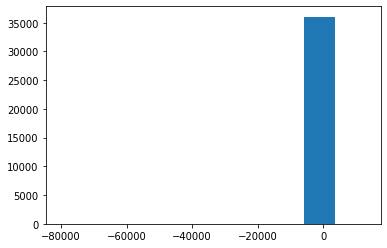

In [30]:
plt.hist(tx_user.Revenue,range =(tx_user.Revenue.min(), tx_user.Revenue.max()))
plt.show()

In [31]:
tx_user['minRevenue'] = tx_user['Revenue'].apply(lambda x: 'True' if x >= 0 else 'False')
minRevenueUser = tx_user[tx_user['minRevenue'] == 'False']
minRevenueUser

,client_id,Recency,Frequency,Revenue,minRevenue
49,128032,28.0,1,-210.60,False
97,123785,17.0,8,-2464.00,False
163,34020,15.0,1,-12.96,False
207,224924,18.0,2,-182.52,False
449,230534,4.0,4,-353.60,False
...,...,...,...,...,...
35354,159462,31.0,1,-585.00,False
35835,41379,18.0,1,-34.56,False
35854,82620,18.0,1,-288.60,False
35928,172454,15.0,1,-54.00,False


In [33]:
userData = tx_user.drop(['client_id','minRevenue'], axis=1)
userData

,Recency,Frequency,Revenue
0,6.0,4,328.32
1,22.0,7,267.54
2,27.0,4,91.14
3,16.0,7,72.72
4,27.0,1,102.96
...,...,...,...
36049,1.0,1,112.32
36050,0.0,1,108.00
36051,0.0,1,234.00
36052,0.0,1,78.00


Data Normalization

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df_data = scaler.fit_transform(userData)
new_df_data

array([[-1.58648072,  1.43191668,  0.41215186],
       [-1.4336597 ,  3.0755088 ,  0.28591754],
       [-1.38590314,  1.43191668, -0.08044859],
       ...,
       [-1.6437886 , -0.21167543,  0.21625813],
       [-1.6437886 , -0.21167543, -0.10773913],
       [-1.6437886 , -0.75953947, -0.10773913]])

Find the k parameter of K-Means using Elbow Method

In [35]:
distortions = []
sse = {}
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=42)
    kmeanModel.fit(new_df_data)
    sse[k] = kmeanModel.inertia_ 

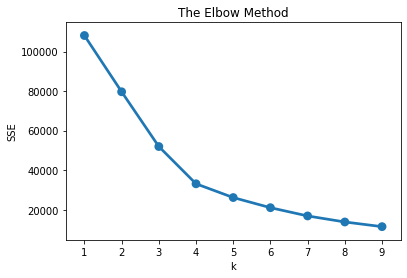

In [36]:
import seaborn as sns
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

The x-axis is the value of the k, and the y-axis is the SSE value of the data. We will take the best parameter by looking at where the k-value will have a linear trend on the next consecutive k.
Based on our observation, the k-value of 4 is the best hyperparameter for our model because the next k-value tend to have a linear trend. Therefore, our best model for the data is K-Means with the number of clusters is 4.

In [37]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(new_df_data)
model.labels_.shape

(36054,)

In [38]:
tx_user["Cluster"] = model.labels_
tx_user.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Revenue':['mean', 'count']}).round(2)

Recency Frequency   Revenue       
           mean      mean      mean  count
Cluster                                   
0         93.82      1.35    135.20  20049
1        277.50      1.08    107.11  15507
2         41.51     12.44    786.79    497
3         95.00      1.00 -80049.84      1

Cluster 3 has one user only and have huge minus revenue, so we can ignore cluster 3 on this segmentation

In [39]:
tx_user[tx_user['Cluster'] == 3]

,client_id,Recency,Frequency,Revenue,minRevenue,Cluster
28733,77223,95.0,1,-80049.84,False,3


In [40]:
df_normalized = pd.DataFrame(new_df_data, columns=['Recency', 'Frequency', 'Revenue'])
df_normalized['client_id'] = tx_user.client_id
df_normalized['Cluster'] = model.labels_

In [41]:
df_normalized = df_normalized[df_normalized['Cluster'] != 3]
df_normalized

,Recency,Frequency,Revenue,client_id,Cluster
0,-1.586481,1.431917,0.412152,9162,0
1,-1.433660,3.075509,0.285918,246708,2
2,-1.385903,1.431917,-0.080449,52476,0
3,-1.490968,3.075509,-0.118705,129362,0
4,-1.385903,-0.211675,-0.055900,47277,0
...,...,...,...,...,...
36049,-1.634237,-0.211675,-0.036460,181398,0
36050,-1.643789,-0.211675,-0.045432,88183,0
36051,-1.643789,-0.211675,0.216258,74461,0
36052,-1.643789,-0.211675,-0.107739,50642,0


In [42]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['client_id', 'Cluster'],
                      value_vars=['Recency','Frequency','Revenue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,client_id,Cluster,Attribute,Value
0,9162,0,Recency,-1.586481
1,246708,2,Recency,-1.433660
2,52476,0,Recency,-1.385903
3,129362,0,Recency,-1.490968
4,47277,0,Recency,-1.385903


Plot the RFM attribute to see the correlation in each cluster

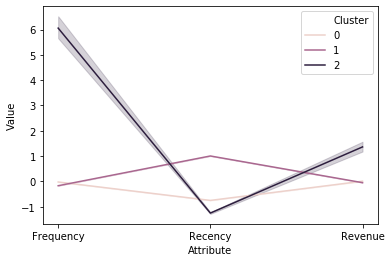

In [43]:
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)

USER SEGMENTATION 
1. Cluster 0 is less frequent, less to spend, but they buy the product recently. Therefore, it could be the cluster of new client.
2. Cluster 1 is less frequent, less to spend, and they buy the product at the old time. Therefore, it could be the cluster of churned client.
3. Cluster 2 is frequent, spend more, and they buy the product recently. Therefore, it could be the cluster of a loyal client.

So, based on this finding we can also answer the question on session 4.c.

In [66]:
loyalClient = tx_user[tx_user['Cluster'] == 2]
loyalClient = loyalClient.sort_values(by='Revenue', ascending=False)

In [67]:
freeVoucherClient = loyalClient.drop(['Recency','minRevenue','Cluster'],axis=1)
freeVoucherClient.iloc[0:100]

,client_id,Frequency,Revenue
130,147944,123,12842.28
182,16146,101,7233.24
14397,108912,35,7060.32
511,189676,47,5888.16
344,167243,19,5436.00
...,...,...,...
1458,121733,12,1128.00
98,133287,12,1128.00
4963,150177,12,1128.00
17702,214295,10,1127.88


# Task 4.f Further Exploration

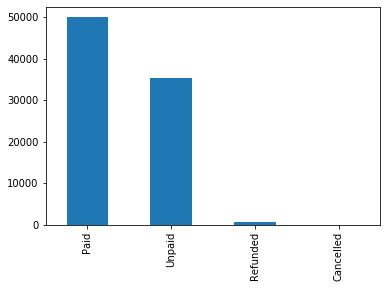

In [110]:
pd.Series(cleanData.invoice_status).value_counts().plot(kind = 'bar')

In [97]:
unpaidTx = cleanData[cleanData['invoice_status']=='Unpaid']
unpaidTx

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price,duplicated
52432,175786,583739.0,824662,Unpaid,Cancelled,10,28,0.00,1M,Renew,2018-12-20T17:00:05Z,NaN,2019-02-07T18:10:31Z,1,28,28.00,False
52433,161058,583747.0,824670,Unpaid,Cancelled,3,13,0.08,1Y,Renew,2018-12-20T17:00:29Z,NaN,2019-02-07T18:11:05Z,12,156,143.52,False
52434,130041,583758.0,824681,Unpaid,Cancelled,2,9,0.31,1Y,Renew,2018-12-20T17:01:04Z,NaN,2019-02-07T20:28:29Z,12,108,74.52,False
52435,179554,583762.0,824688,Unpaid,Pending Setup,3,13,0.50,1Y,Activate,2018-12-20T17:11:37Z,NaN,NaN,12,156,78.00,False
52436,178180,583807.0,824737,Unpaid,Pending Setup,11,39,0.72,1Y,Activate,2018-12-20T17:25:38Z,NaN,NaN,12,468,131.04,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88217,167962,882294.0,1234042,Unpaid,Pending Setup,1,6,0.29,1Y,Activate,2019-12-16T15:50:32Z,NaN,NaN,12,72,51.12,False
88218,154829,882303.0,1234057,Unpaid,Pending Setup,4,18,0.42,1Y,Activate,2019-12-16T16:17:52Z,NaN,NaN,12,216,125.28,False
88219,260103,882308.0,1234065,Unpaid,Pending Setup,1,6,0.32,1Y,Activate,2019-12-16T16:30:42Z,NaN,NaN,12,72,48.96,False
88220,123628,882310.0,1234067,Unpaid,Active,2,9,0.31,1Y,Activate,2019-12-16T16:36:42Z,NaN,NaN,12,108,74.52,False


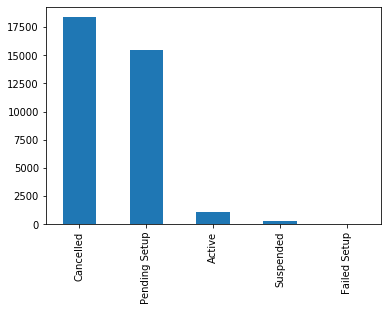

In [109]:
pd.Series(unpaidTx.service_status).value_counts().plot(kind = 'bar')

From unpaid transaction, we can see that the biggest cause of unpaid transaction is cancellation and the second is pending setup.
For pending setup, I can not clearly understand the meaning behind it, whether the user do not finish their registration or the service provider do not finist to set up the environment. Let say the meaning is user do not finish the registration.
- If the case is user do not finish the registration, we send the reminder to the user like push notification via user's email to complete the registration

In [120]:
unpaidTx.groupby(['product_id']).agg('sum')

,client_id,invoice_id,invoice_item_id,monthly_price_usd,discount,monthly_period,total_price,discounted_price,duplicated
product_id,,,,,,,,,
1,581141985,2.758991e+09,3846672701,22494,1191.88,52809,316854,204328.08,False
2,1172060635,6.168508e+09,8597331680,75492,2787.56,104400,939600,623938.68,False
3,2341619126,1.098975e+10,15333556676,196170,7557.69,260364,3384732,1467186.24,False
4,656019355,3.331770e+09,4646118414,81486,1862.83,63651,1145718,666565.20,False
5,64912171,2.821310e+08,392551568,8784,116.35,2819,67656,43248.00,False
6,21244917,1.008978e+08,140307297,4454,40.51,969,32946,21063.00,False
7,46559306,1.978843e+08,275319265,16384,127.00,4463,285632,114656.00,False
8,13310447,6.132276e+07,85324276,10168,25.63,964,119536,81238.60,False
9,191959825,8.973523e+08,1251773014,20859,117.55,4790,81430,67603.73,False


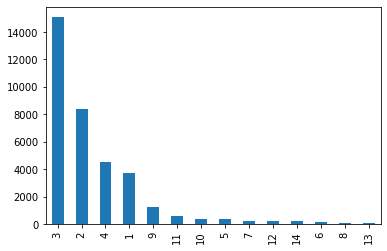

In [112]:
pd.Series(unpaidTx.product_id).value_counts().plot(kind = 'bar')

The most cancellation product is Product 3. We can do more analysis on Product 3 to see the cause why user tend to cancel the payment on Product 3

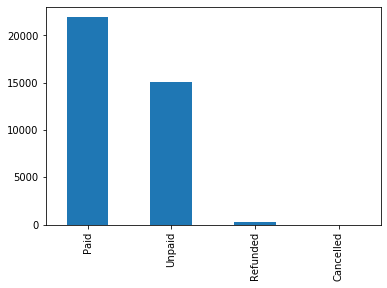

In [116]:
product_3 = cleanData[cleanData['product_id']==3]
pd.Series(product_3.invoice_status).value_counts().plot(kind = 'bar')

The cause why product 3 has the biggest unpaid transaction is because product 3 has the biggest demand, so the corelation is linear. We can conclude that the cause of user do not pay the service is nothing to do with the product/services.

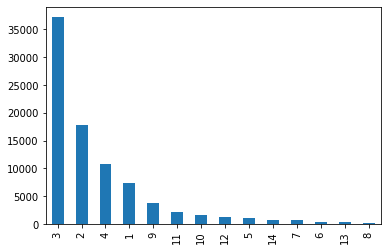

In [122]:
pd.Series(cleanData.product_id).value_counts().plot(kind = 'bar')

From overall transaction, we can see Product 11, 10, 12, 5, 14, 7 , 6 , 13, and 8 has the least transaction. Maybe 

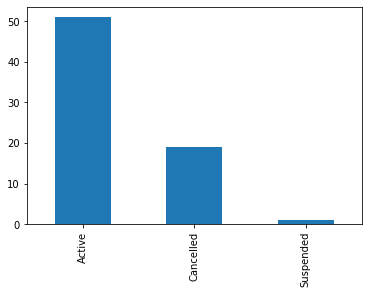

In [126]:
product_8 = paidProduct[paidProduct['product_id']==8]
pd.Series(product_8.service_status).value_counts().plot(kind = 'bar')

Product 8 has the most expensive price, so it can be the cause why Product 8 has least transaction. To increase the transaction, we can do several promotion to gain the user engagement
1. Discount package
2. Gradually expose the depth of the product (push notification / email notification)
3. Announce features and improvements in-app
4. Trial Product
5. Membership